In [ ]:
import os
!pip install tweepy
import tweepy as tw
import pandas as pd
!pip install twitter

In [2]:
consumer_key = "*******************"
consumer_secret = "*******************"
access_token = "*******************"
access_token_secret = "*******************"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Getting 1000 Hulu Tweets

In [4]:
search_words = "#hulu"
date_since ="2019-10-01"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(1000)

# Collect a list of tweets
[tweet.text for tweet in tweets]

Removing retweets

In [43]:
new_search = search_words + " -filter:retweets"
new_search
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(1000)

tweet_loc=[tweet.text for tweet in tweets]

Storing tweets in a dataframe

In [44]:
tweet_text = pd.DataFrame(data=tweet_loc, 
                    columns=['tweet'])
tweet_text

,tweet
0,I asked #Alexa to “Play South Park on #Hulu” f...
1,There are only a few shows that I used to LOVE...
2,In honor of #Booksmart being on Hulu check out...
3,#DisneyPlus #Disney #Hulu #StarWars #Pixar #th...
4,No matter how broke we are.. We have enough mo...
...,...
995,Day Off in Bed Binge Watching @MaskedSingerFOX...
996,@hobybrenner @hulu @TabloTV @Philo Do Tablo an...
997,#CordCuttersNews \n\n@hulu Live tv subscribers...
998,@RememberEbola Visit my website ; https://t.co...


Saving Hulu Tweets to CSV

In [40]:
tweet_text.to_csv(r'C:\Users\***\Documents\Tech Consulting\HuluTweets.csv')

# Getting 1000 Netflix Tweets

In [6]:
# Define the search term and the date_since date as variables
search_word = "#netflix"
date_since1 ="2019-10-01"

In [ ]:
# Collect tweets
tweets1 = tw.Cursor(api.search,
                       q=search_word,
                       lang="en",
                       since=date_since1).items(1000)

# Collect a list of tweets
[tweet.text for tweet in tweets1]

Removing Retweets

In [ ]:
new_search1 = search_word + " -filter:retweets"
new_search1
tweets1 = tw.Cursor(api.search,
                       q=new_search1,
                       lang="en",
                       since=date_since1).items(1000)

tweet_loc1=[tweet.text for tweet in tweets1]

Storing tweets in a dataframe

In [ ]:
tweet_text1 = pd.DataFrame(data=tweet_loc1, 
                    columns=['tweet'])
tweet_text1

Saving dataframe to csv

In [ ]:
tweet_text1.to_csv(r'C:\Users\***\Documents\Tech Consulting\NetflixTweets.csv')

# WordCloud for Netflix
What are users mainly talking about regarding Netflix?

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import pandas as pd

In [22]:
df=pd.read_csv(r'C:\Users\***\Documents\Tech Consulting\NetflixTweets.csv')
df.tweet

0      The #Vikings saga, entering its 6th and final ...
1      New episode airing now. \nhttps://t.co/mVjLJ3R...
2      First look at fast and furious spy racers the ...
3      Just finished watching Troy Fall of a City by ...
4      OK I officially overdosed #PatriotAct... Hey @...
                             ...                        
992    #Netflix's superbly acted, lavish Royal saga #...
993                      GEOSTORM. #NowWatching #NetFlix
994    Even though #Netflix latest film #Klaus  is go...
995    Home For Christmas | Official Trailer | Netfli...
996    Oh my lawd!! it finally showed-up!! 😃😃😃😃\nThan...
Name: tweet, Length: 997, dtype: object

In [ ]:
#removed certain stop words

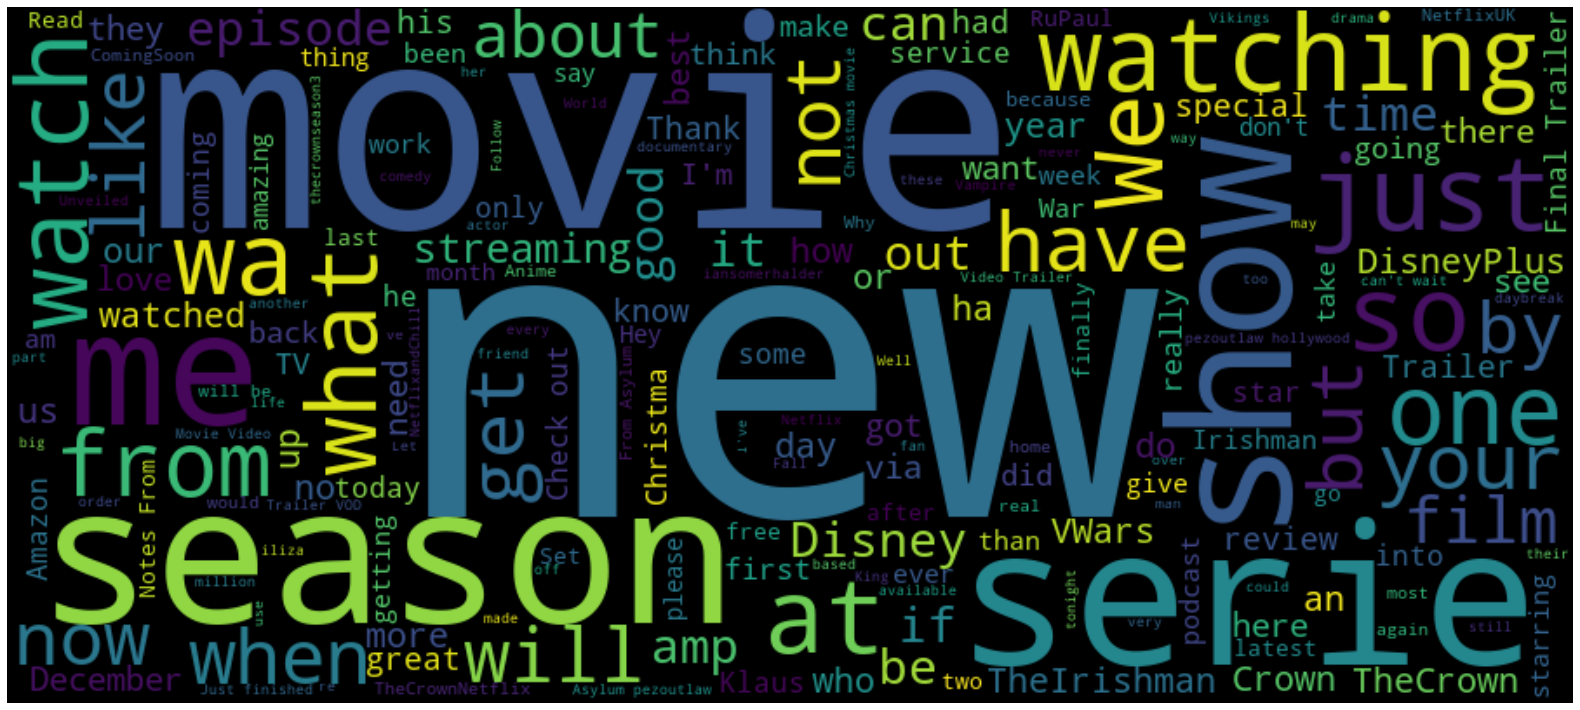

In [29]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black', width=900, height=400,
                      stopwords=["Netflix", 'my','as',"https","co",'and','are','on','for','the','it','thi','to','that','is','in','with','of','you','all','this']).generate(" ".join(df.tweet))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

Users seem to be tweeting mostly about:
1. movies- The IrishmanD
2. new seasons of shows- especially the crown 
3. Other streaming Services like Amazon Prime Video and Disney Plus
4. Customer Service

# WordCloud for Hulu
What are users mainly talking about regarding Hulu?

In [3]:
df1=pd.read_csv(r'C:\Users\***\Documents\Tech Consulting\HuluTweets.csv')
df1.tweet

0      In honor of #Booksmart being on Hulu check out...
1      #DisneyPlus #Disney #Hulu #StarWars #Pixar #th...
2      No matter how broke we are.. We have enough mo...
3      #Booksmart Is Just So Good. MOLLY AND AMYS FRI...
4      @notthetruelodge I NEED to know what's behind ...
                             ...                        
995    #CordCuttersNews \n\n@hulu Live tv subscribers...
996    @RememberEbola Visit my website ; https://t.co...
997    @Just_Zoom_In Visit my website ; https://t.co/...
998    @Hajerbakhurji Visit my website ; https://t.co...
999    Seriously!? Yet again I get another notice fro...
Name: tweet, Length: 1000, dtype: object

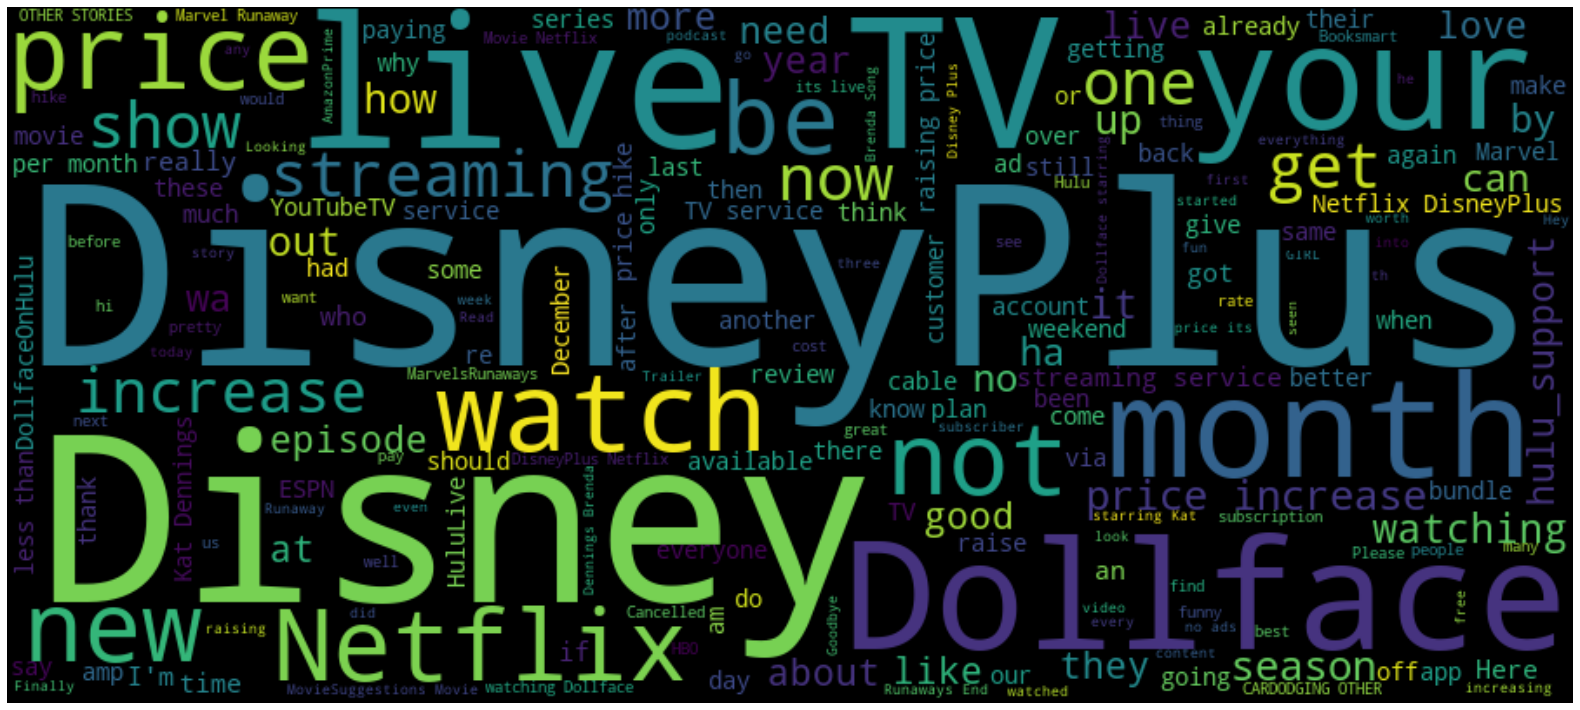

In [4]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black', width=900, height=400,
                      stopwords=["Hulu",'what','just','have','from','but', 'my','me','we','so','will','as',"https","co",'and','are','on','for','the','it','thi','to','that','is','in','with','of','you','all','this']).generate(" ".join(df1.tweet))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

Users seem to be tweeting mostly about:
1. Disney Plus & Netflix
2. Live TV
3. Price increase for live TV
4. Customer Service issues - Hulu support
5. Dollface (as well as kat dennings)